> Installing Geopandas

In [ ]:
#@title Default title text
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-

> Main Code

In [ ]:
import pandas as pd
import geopandas as gpd # Geopandas doesn't understand Csv file.
from shapely.geometry import Point , Polygon
import matplotlib.pyplot as plt
%matplotlib inline 

> Reading India Shape File with the help of Geopandas and renaming the columns.

In [ ]:
shapes = gpd.read_file("/content/drive/My Drive/Colab Notebooks/Files_To_Read/Igismap/Indian_States.shp")
shapes['st_nm'] = shapes['st_nm'].str.replace("Andaman & Nicobar Island" , "Andaman and Nicobar Islands" , case=False)
shapes['st_nm'] = shapes['st_nm'].str.replace("Arunanchal Pradesh" , "Arunachal Pradesh" , case=False)
shapes['st_nm'] = shapes['st_nm'].str.replace("NCT of Delhi" , "Delhi" , case=False)
shapes['st_nm'] = shapes['st_nm'].str.replace("Dadara & Nagar Havelli" , "Dadra and Nagar Haveli and Daman and Diu" , case=False)
shapes['st_nm'] = shapes['st_nm'].str.replace("Jammu & Kashmir" , "Jammu and Kashmir" , case=False)
shapes.set_index("st_nm" , inplace=True)
shapes.head()

,geometry
st_nm,
Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


> Type of Shapes file is GeoDataFrame because it contains geometry column.

In [ ]:
type(shapes)

geopandas.geodataframe.GeoDataFrame

> Reading Csv file with the help of Pandas.

In [ ]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Files_To_Read/datasets_557629_1337247_StatewiseTestingDetails.csv")
data.set_index("State" , inplace=True)
data.head()

,Date,TotalSamples,Negative,Positive
State,,,,
Andaman and Nicobar Islands,2020-04-17,1403.0,1210,12.0
Andaman and Nicobar Islands,2020-04-24,2679.0,NaN,27.0
Andaman and Nicobar Islands,2020-04-27,2848.0,NaN,33.0
Andaman and Nicobar Islands,2020-05-01,3754.0,NaN,33.0
Andaman and Nicobar Islands,2020-05-16,6677.0,NaN,33.0


> Creating Pandas DataFrame to GeoDataFrame by adding a new column of geometry.

In [ ]:
data['geometry'] = shapes['geometry']
data = data.reset_index()
data['Negative']  = data['TotalSamples'] - data['Positive']
data.head()

,State,Date,TotalSamples,Negative,Positive,geometry
0,Andaman and Nicobar Islands,2020-04-17,1403.0,1391.0,12.0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Andaman and Nicobar Islands,2020-04-24,2679.0,2652.0,27.0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
2,Andaman and Nicobar Islands,2020-04-27,2848.0,2815.0,33.0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
3,Andaman and Nicobar Islands,2020-05-01,3754.0,3721.0,33.0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
4,Andaman and Nicobar Islands,2020-05-16,6677.0,6644.0,33.0,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."


In [ ]:
dt = data.groupby("State").sum()
dt['geometry'] = shapes['geometry']
dt.reset_index(inplace=True)
dt.iloc[29]

State                                                  Tamil Nadu
TotalSamples                                          5.43831e+07
Negative                                              5.08041e+07
Positive                                              3.57898e+06
geometry        (POLYGON ((78.1918808983848 8.727295397864395,...
Name: 29, dtype: object

In [ ]:
dt = gpd.GeoDataFrame(dt , geometry = "geometry")

> Simply Plotting the shapes.

(66.72479680851099, 98.87674485180855, 5.239837141605822, 38.59438381762416)

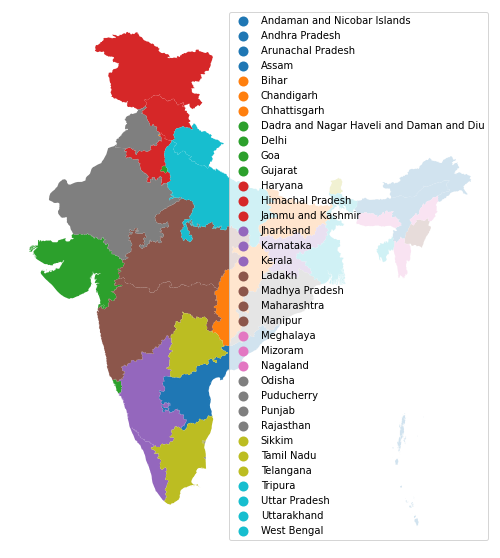

In [ ]:
dt.plot(column="State" , figsize=(10,10) , legend=True , label="Population").axis("off")

In [ ]:
dt.Negative.mean()

12358834.114285715

> Showing the states having Above average cases.

(66.72479680851099, 98.87674485180854, 5.239837141605822, 38.594383817624156)

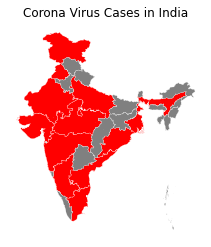

In [ ]:
moreNegative = dt[dt.Negative > 12358834.0]
lessNegative = dt[dt.Negative < 12358834.0]
fig , ax = plt.subplots(1)
lessNegative
ax.set_title("Corona Virus Cases in India")
moreNegative.plot(ax=ax , color='red' , edgecolor="white" , linewidth=0.2 ,legend=True , legend_kwds={'label':"Population"}).axis("off")
lessNegative.plot(ax=ax , color='grey' , edgecolor="white" ,legend=True , legend_kwds={'label':"Population"}, linewidth=0.2).axis("off")